## Kapitel 3 - Ein neuronales Netz

Ein erster Schritt: Ein einfaches Netz, das die Einordnung von Dingen in zwei Kategorien ermöglicht (binäre Klassifizierurng).

## DIe Entscheidung

In [1]:
def entscheidung(summe):
    """Berechnung der Entscheidung zum Wert summe
        Input: 
        Output: 1, falls summe >= 1,
                0, sonst
    """
    if summe >= 1:
        return 1
    else:
        return 0

In [2]:
#berechnnung der entscheidung
ergebnis = entscheidung (1)
print (ergebnis)

1


## Dokumentationsstring

In [3]:
print("Docstring:") 
print(entscheidung.__doc__)

Docstring:
Berechnung der Entscheidung zum Wert summe
        Input: 
        Output: 1, falls summe >= 1,
                0, sonst
    


## Stufenfunktion

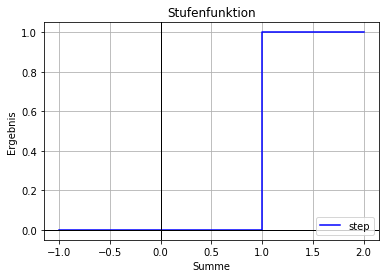

In [4]:
# Import der Module
import matplotlib.pyplot as plt
# Ganz wichtig, sonst wird der Plot nicht angezeigt (im jn...jupyternotebook)
%matplotlib inline

# x/y Werte des Graphen
x = [-1, 0, 0, 0.999, 1, 2]
# y Werte mit der Funktion entscheidung berchnen
y = [entscheidung(i) for i in x]
# Erzeugen des Graphen mit einer blauen Stufe und Bezeichnung step
plt.step(x, y, '-b', label='step')

# Die Achsen setzen
plt.grid(True)
# die horizontale und vertikale 0-Achse etwas dicker in Schwarz zeichnen
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Achsenbeschriftung und -titel
plt.xlabel('Summe')
plt.ylabel('Ergebnis')
plt.title('Stufenfunktion')

# Legenden Platzierung festlegen
plt.legend(loc='lower right')

# Den Graph anzeigen
plt.show()

## Scatter Plot

Der Vektor x1:  [0 0 1 1]


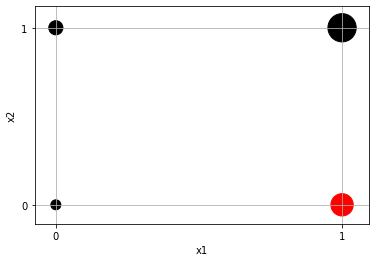

In [5]:
# Scatter-Plot
# Import der Module
import matplotlib.pyplot as plt
# Ganz wichtig, sonst wird der Plot nicht angezeigt
%matplotlib inline

import numpy as np
#import matplotlib
# Funktion array wandelt eine Python-Liste ist ein Numpy-Array um
# Die Koordinaten x1 = x
x1 = np.array([0,0,1,1])
# Die Koordination x2 = y
x2 = np.array([0,1,0,1])
# Die Farben für die Punkte
color = np.array(['black', 'black', 'red', 'black'])

# Die Punktgröße für jeden Punkt
size = np.array([100, 200, 500, 800])

# Den Vektor x1 mit allen x1-Koordination ausgeben
print('Der Vektor x1: ', x1)

# Die Achsen setzen
plt.grid(True)

# Den plot zeichnen für die x1- und x2-Koordination, Farbe und Größe
plt.scatter(x1, x2, c=color, s=size)

# Die Achsen setzen
plt.xlabel('x1')
plt.ylabel('x2')

# Die Achseneinteilung
plt.xticks([0.0, 1.0])
plt.yticks([0.0, 1.0])

# Endlich den Plot ausgeben
plt.show()

## Scatter Plot Iris Datensatz

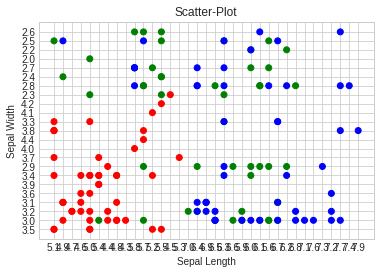

In [7]:
# Scatter-Plot-Iris-Datensatz
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# File einlesen
fobj = open("iris.csv", "r")

# x1 sind die Koordinaten der x-Achse, x2 die der y-Achse
x1=[]
x2=[]
# Farben für die Datenpunkte
colors=[]

# Mapping der Schwertlilien zu Farben mit einem Python Dictionary
iris_colors = { 'Iris-setosa' : 'red',
             'Iris-versicolor' : 'green',
             'Iris-virginica' : 'blue'}

# Den Datensatz zeilenweise verarbeiten
for line in fobj:
    # Split
    words = line.rstrip().split(",")
    # Leerzeilen auslassen
    if len(words) != 5:
        continue
    # SeptalLength
    x1.append(words[0])
    # SepalWidth
    x2.append(words[1])
    # Farbe
    colors.append(iris_colors[words[4]])
fobj.close()

# Gitter im Scatter-Plot zeichnen
plt.style.use('seaborn-whitegrid')
# Achsenbeschriftung und Titel
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter-Plot')
# Den Plot ausgeben
plt.scatter(np.array(x1), np.array(x2), color=colors)

## Ermittlung des Skalarprodukts

In [1]:
# Die Multiplikation von Vektoren mit numpy
#  Dot Product, Skalarprodukt, Inneres Produkt, 
#   macht aus zwei Sequenzen von Zahlen eine Zahl (algebraisch)
#  Es ist der Cosinus des Winkels zwischen zwei Vektoren (geometrisch)
#   multipliziert mit deren Längen
import numpy as np

# numpy array erzeugen
x = np.array([0,1])
# numpy array erzeugen
w = np.array([0.5,0.7])

# Vektor x ausgeben
print("x =", x)
# Vektor w ausgeben
print("w =", w)
# numpy arrays sind keine Matrizen und 
# die Operatoren *, +, -, / funktionieren Element für Element
print("w*x =",w*x)
# Inneres Produkt. Man muss den Vektor nicht transponieren, 
# das erledigt numpy für uns
print("np.dot(w,x) =", np.dot(w,x))
# Alternative Syntax zum Dot Product
print("w.dot(x) =", w.dot(x)) 

x = [0 1]
w = [0.5 0.7]
w*x = [0.  0.7]
np.dot(w,x) = 0.7
w.dot(x) = 0.7


## Aufgabe - Personalplanung

In [30]:
# Perceptron Forward Path
import matplotlib.pyplot as plt
import numpy as np

# 3-dimensionaler Input = Bias-Neuronen, Fr. Karotte, Hr. Lauch
# 4 Inputvektoren
X = np.array([
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]])
# Die 4 gewünschten Ergebniswerte
y = np.array([0,1,1,1])
#Heaviside-Funktion
def heaviside(summe):
    """Berechnung der Entscheidung zum Wert summe
        Input: summe
        Output: 1, fakks summe >=0,
                0, sonst
    """

    if summe >= 0:
        return 1
    else:
        return 0

# Perceptron-Berechnung (Forward Path)
def perceptron_eval(X,y):
    # Der Gesamtfehler
    gesamtfehler = 0;
    # Die Gewichte so wählen, dass das OR-Problem gelöst werden kann
    w = np.array([-1,1,1])
    
    # Index i und Element-x-Ermittlung vom Array X
    for i, x in enumerate(X):
    # x = Zeile für Zeile verwenden
    # Inneres Produkt zwischen x und w
        summe = np.dot(w,x)
        ergebnis = heaviside(summe)
        # Fehler
        fehler = np.abs(ergebnis - y[i])
        # Gesamtfehler
        gesamtfehler += fehler
        # Ausgabe
        print("Fr. Karotte = {}, Hr. Lauch = {}, Ergebnis = {}, Fehler = {}".
             format(x[1], x[2], y[i], fehler))
        # Gesamtfehler pro Epoche über ganzen Trainingsdatensatz
    return gesamtfehler

#------------------------------------------
# Core Function zum Auswerten des Inputs
gesamtfehler = perceptron_eval(X,y)
print("Gesamtfehler = %1d" % (gesamtfehler))

Fr. Karotte = 0, Hr. Lauch = 0, Ergebnis = 0, Fehler = 0
Fr. Karotte = 0, Hr. Lauch = 1, Ergebnis = 1, Fehler = 0
Fr. Karotte = 1, Hr. Lauch = 0, Ergebnis = 1, Fehler = 0
Fr. Karotte = 1, Hr. Lauch = 1, Ergebnis = 1, Fehler = 0
Gesamtfehler = 0


## Aufgabe - Roboterschutz

In [39]:
# Perceptron Forward Path
import matplotlib.pyplot as plt
import numpy as np

# 3-dimensionaler Input = bias, linker sensor, rechter sensor
# 4 Inputvektoren
X = np.array([
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]])
# Die 4 gewünschten Ergebniswerte
y = np.array([0,0,0,1])
#Heaviside-Funktion
def heaviside(summe):
    """Berechnung der Entscheidung zum Wert summe
        Input: summe
        Output: 1, fakks summe >=0,
                0, sonst
    """

    if summe >= 0:
        return 1
    else:
        return 0

# Perceptron-Berechnung (Forward Path)
def perceptron_eval(X,y):
    # Der Gesamtfehler
    gesamtfehler = 0;
    # Die Gewichte so wählen, dass das OR-Problem gelöst werden kann
    w = np.array([-2,1,1])
    
    # Index i und Element-x-Ermittlung vom Array X
    for i, x in enumerate(X):
    # x = Zeile für Zeile verwenden
    # Inneres Produkt zwischen x und w
        summe = np.dot(w,x)
        ergebnis = heaviside(summe)
        # Fehler
        fehler = np.abs(ergebnis - y[i])
        # Gesamtfehler
        gesamtfehler += fehler
        # Ausgabe
        print("linker sensor = {}, rechter sensor = {}, Ergebnis = {}, Fehler = {}".
             format(x[1], x[2], y[i], fehler))
        # Gesamtfehler pro Epoche über ganzen Trainingsdatensatz
    return gesamtfehler

#------------------------------------------
# Core Function zum Auswerten des Inputs
gesamtfehler = perceptron_eval(X,y)
print("Gesamtfehler = %1d" % (gesamtfehler))

linker sensor = 0, rechter sensor = 0, Ergebnis = 0, Fehler = 0
linker sensor = 0, rechter sensor = 1, Ergebnis = 0, Fehler = 0
linker sensor = 1, rechter sensor = 0, Ergebnis = 0, Fehler = 0
linker sensor = 1, rechter sensor = 1, Ergebnis = 1, Fehler = 0
Gesamtfehler = 0
